In [2]:
import numpy as np

def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):

    m, n = X.shape
    theta = np.zeros(n)

    for _ in range(num_iterations):
        hypothesis = X.dot(theta)
        error = hypothesis - y
        gradient = (1 / m) * X.T.dot(error)
        theta -= learning_rate * gradient

    return theta

In [18]:

def adam(X, y, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iterations=1000):

    m, n = X.shape
    theta = np.zeros(n)
    m_t = np.zeros(n)
    v_t = np.zeros(n)

    for t in range(1, num_iterations + 1):
        hypothesis = X.dot(theta)
        error = hypothesis - y
        gradient = (1 / m) * X.T.dot(error)

        m_t = beta1 * m_t + (1 - beta1) * gradient
        v_t = beta2 * v_t + (1 - beta2) * (gradient ** 2)
        m_t_hat = m_t / (1 - beta1 ** t)
        v_t_hat = v_t / (1 - beta2 ** t)

        theta -= learning_rate * m_t_hat / (np.sqrt(v_t_hat) + epsilon)

    return theta

In [4]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, num_epochs=100, batch_size=32):


    m, n = X.shape
    theta = np.zeros(n)

    for epoch in range(num_epochs):
        np.random.shuffle(X)
        np.random.shuffle(y)

        for i in range(0, m, batch_size):
            batch_X = X[i:i+batch_size]
            batch_y = y[i:i+batch_size]

            hypothesis = batch_X.dot(theta)
            error = hypothesis - batch_y
            gradient = (1 / batch_size) * batch_X.T.dot(error)
            theta -= learning_rate * gradient

    return theta

In [14]:
def adagrad(X, y, learning_rate=0.01, epsilon=1e-8, num_iterations=1000):

    m, n = X.shape
    theta = np.zeros(n)
    cache = np.zeros(n)

    for _ in range(num_iterations):
        hypothesis = X.dot(theta)
        error = hypothesis - y
        gradient = (1 / m) * X.T.dot(error)

        cache += gradient ** 2
        theta -= learning_rate / np.sqrt(cache + epsilon) * gradient

    return theta

In [5]:
def rmsprop(X, y, learning_rate=0.01, decay_rate=0.9, epsilon=1e-8, num_iterations=1000):

    m, n = X.shape
    theta = np.zeros(n)
    cache = np.zeros(n)

    for _ in range(num_iterations):
        hypothesis = X.dot(theta)
        error = hypothesis - y
        gradient = (1 / m) * X.T.dot(error)

        cache = decay_rate * cache + (1 - decay_rate) * (gradient ** 2)
        theta -= learning_rate / np.sqrt(cache + epsilon) * gradient

    return theta

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def quadratic_loss(theta, X, y):
    m = X.shape[0]
    hypothesis = X.dot(theta)
    error = hypothesis - y
    loss = (1 / (2 * m)) * np.sum(error ** 2)
    return loss

In [7]:
np.random.seed(42)
m = 100
n = 2
X = np.random.rand(m, n)
y = np.random.rand(m)

theta_true = np.array([2, -1])

theta_init = np.zeros(n)

num_iterations = 100

learning_rate = 0.01

In [8]:
loss_gd = []
loss_adam = []
loss_sgd = []
loss_adagrad = []
loss_rmsprop = []

In [9]:
theta_gd = gradient_descent(X, y, learning_rate, num_iterations)
for _ in range(num_iterations):
    loss_gd.append(quadratic_loss(theta_gd, X, y))

In [ ]:
theta_adam = adam(X, y, learning_rate, num_iterations)
for _ in range(num_iterations):
    loss_adam.append(quadratic_loss(theta_adam, X, y))

In [12]:
theta_sgd = stochastic_gradient_descent(X, y, learning_rate, num_iterations, batch_size=32)
for _ in range(num_iterations):
    loss_sgd.append(quadratic_loss(theta_sgd, X, y))

In [15]:
theta_adagrad = adagrad(X, y, learning_rate, num_iterations)
for _ in range(num_iterations):
    loss_adagrad.append(quadratic_loss(theta_adagrad, X, y))

In [16]:
theta_rmsprop = rmsprop(X, y, learning_rate, num_iterations)
for _ in range(num_iterations):
    loss_rmsprop.append(quadratic_loss(theta_rmsprop, X, y))

/tmp/ipykernel_36/3869884359.py:13: RuntimeWarning: invalid value encountered in sqrt
  theta -= learning_rate / np.sqrt(cache + epsilon) * gradient


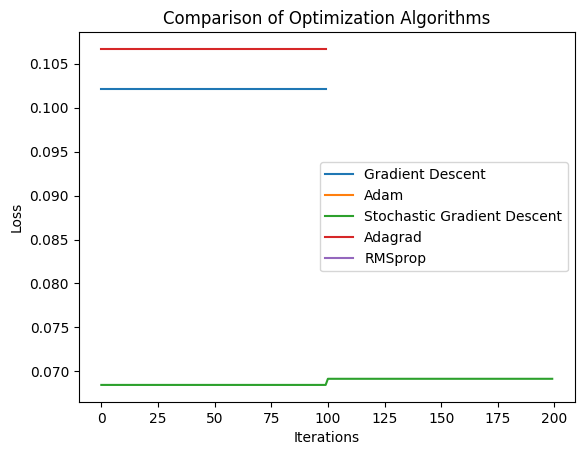

In [17]:
plt.plot(loss_gd, label='Gradient Descent')
plt.plot(loss_adam, label='Adam')
plt.plot(loss_sgd, label='Stochastic Gradient Descent')
plt.plot(loss_adagrad, label='Adagrad')
plt.plot(loss_rmsprop, label='RMSprop')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Comparison of Optimization Algorithms')
plt.show()